In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/78693421/how-to-generate-specific-distribution

In [2]:
data = pd.read_excel("metric.xlsx")
x = data["metric"].values

In [3]:
data.describe()

,metric
count,100000.000000
mean,479.349410
std,1397.884758
min,0.000000
25%,32.000000
50%,125.000000
75%,420.250000
max,92179.000000


In [22]:
def qqplot(data, law_factory, axe=None):
    
    if axe is None:
        fig, axe = plt.subplots()
    
    # Compute ECDF from data:
    ecdf = stats.ecdf(data)
    
    # Check if law is already parametered:
    if isinstance(law_factory, stats._distn_infrastructure.rv_continuous_frozen):
        law = law_factory
    # Fit using MLE if not the case:
    else:
        parameters = law_factory.fit(data)
        law = law_factory(*parameters)

    # Compute theoretical quantiles:
    quantiles = law.ppf(ecdf.cdf.probabilities)
    
    axe.scatter(quantiles, ecdf.cdf.quantiles, marker=".")
    axe.loglog(quantiles, quantiles, "--", color="black")
    axe.set_title("Q-Q Plot: %s\n args=%s, kwargs=%s" % (law.dist.name, law.args, law.kwds))
    axe.set_xlabel("Theoretical Quantile")
    axe.set_ylabel("Empirical Quantile")
    axe.grid()
    
    return axe

In [23]:
law = stats.weibull_min(0.515, 0., 255)

In [24]:
law.mean(), law.median(), law.std()

(np.float64(483.6354920523887),
 np.float64(125.15938076151359),
 np.float64(1038.0381191410875))

<Axes: title={'center': 'Q-Q Plot: weibull_min\n args=(0.515, 0.0, 255), kwargs={}'}, xlabel='Theoretical Quantile', ylabel='Empirical Quantile'>

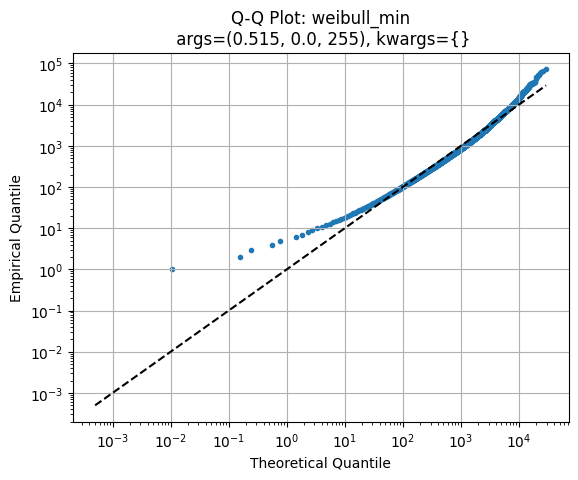

In [25]:
qqplot(x, law)

In [32]:
law.ppf(0.25), law.ppf(0.75)

(np.float64(22.69266075330299), np.float64(480.82569629675584))

In [29]:
law.kwds

{}

In [30]:
law.args

(0.515, 0.0, 255)